# Scikit-Learn

[Link to Homepage](https://scikit-learn.org/stable/tutorial/index.html)

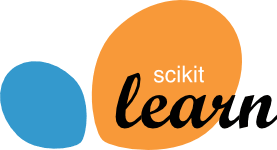

Scikit-Learn is an open-source python library that facilitates many types of both Supervised and Unsupervised Machine Learning algorithms. It is based on libraries and packages such as NumPy, SciPy, Sympy, Matplotlib, and Pandas.

There are many models in Scikit-Learn used for data modelling. Some of the examples are Classification, Regression, Clustering, etc.

This Jupyter notebook contains a demonstration of the following algorithms.

1. Random Forest Classification 
2. Linear Regression 
3. K-means Clustering

<br>

# 1. Random Forest Classification Algorithm

Classification models belong to Supervised Machine Learning. We give input data with several features and expect the model to divide those records into specific categories. Since this is a Supervised Machine Learning model, we first feed some train data with features and marked categories. Then the model predicts the categories for the test data.

Data used here is from wine quality data set in https://archive.ics.uci.edu/ml/index.php.

Two datasets include red and white vinho verde wine samples from the north of Portugal. The model should decide the wine quality based on several characteristics.

Let us first look at what Random Forest Classification Algorithm does.

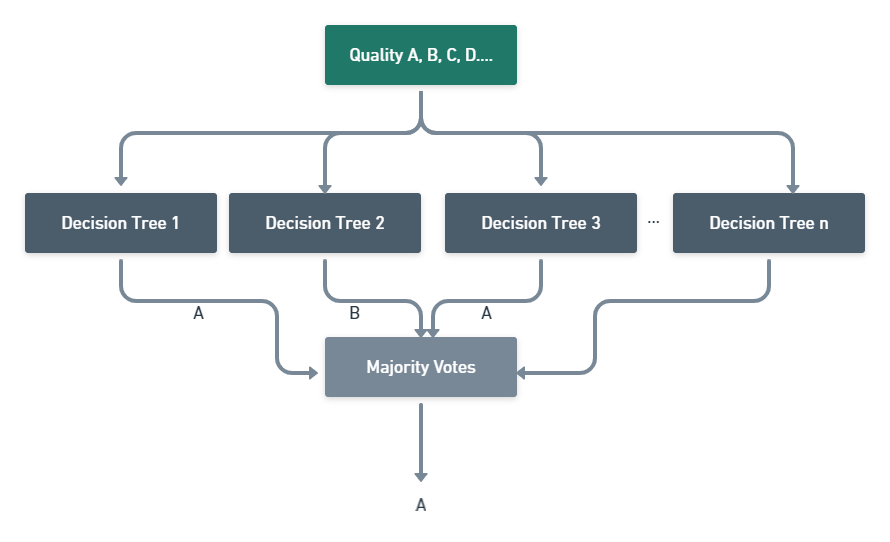

As shown in the above image, this model consists of decision trees that will decide the Quality of each record according to their calculations(Decision Tree 1 selects A, Decision Tree 2 selects B, ....). Final Decision is based on the majority of votes, which is, in this case, A

## Set up

In [1]:
# Numerical arrays.
import numpy as np

# Data frames.
import pandas as pd

# Plotting.
import matplotlib.pyplot as plt

# Logistic regression.
import sklearn.linear_model as lm

# K nearest neaighbours.
import sklearn.neighbors as nei

# Helper functions.
import sklearn.model_selection as mod

# Fancier, statistical plots.
import seaborn as sns


In [2]:
# Standard plot size.
plt.rcParams['figure.figsize'] = (15, 10)

# Standard colour scheme.
plt.style.use('ggplot')

## Importing Data 

In [3]:
# Have a look at the data.
df1= pd.read_csv('data/winequality-red.csv', sep=";")
df1["isRed"] = 1  

In [4]:
# Have a look at the data.
df2 = pd.read_csv('data/winequality-white.csv', sep=";")
df2["isRed"] = 0

In [5]:
df=pd.concat([df1, df2])

In [6]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,isRed
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,0
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,0
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,0
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,0


## Data Visualization

<AxesSubplot:xlabel='alcohol', ylabel='quality'>

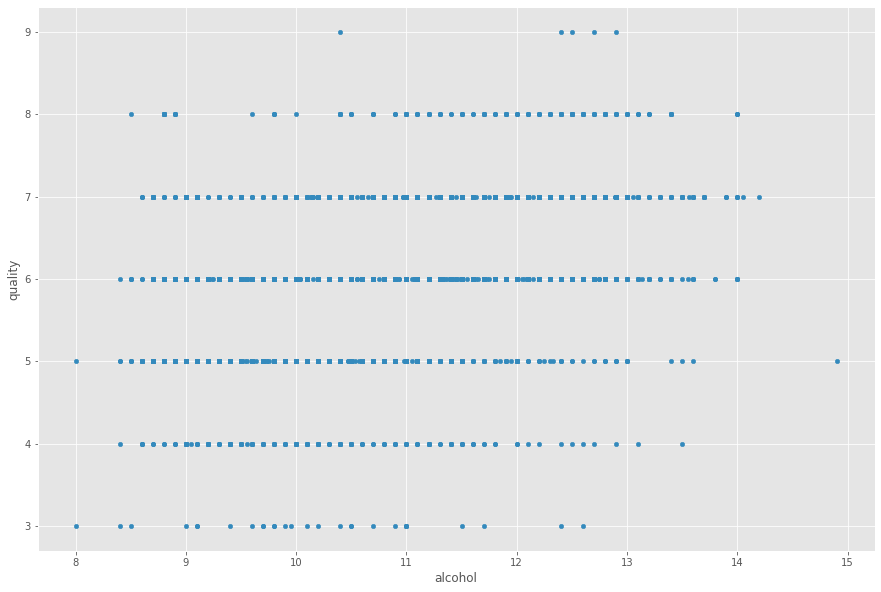

In [7]:
# Plot quality against alcohol quantity
df.plot.scatter(x = 'alcohol', y = 'quality')

Text(0, 0.5, 'quality')

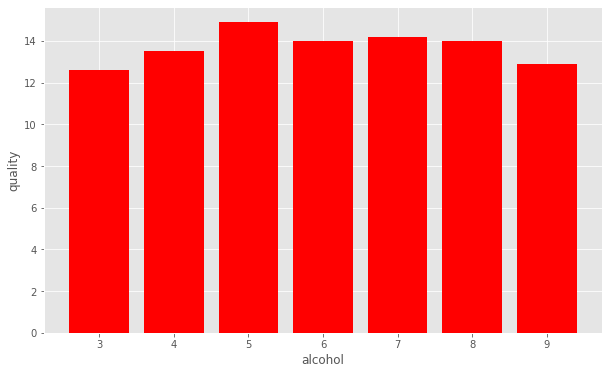

In [8]:
plt.figure(figsize=[10,6])
# plot bar graph
plt.bar(df['quality'],df['alcohol'],color='red')
# label x-axis
plt.xlabel('alcohol')
#label y-axis
plt.ylabel('quality')

## Statistics

In [9]:
# Group by typically takes a categorical variable.
x = df.groupby('quality')
x

In [10]:
# Pivot tables.
x.mean()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,isRed
quality,,,,,,,,,,,,
3,7.853333,0.517000,0.281000,5.140000,0.077033,39.216667,122.033333,0.995744,3.257667,0.506333,10.215000,0.333333
4,7.288889,0.457963,0.272315,4.153704,0.060056,20.636574,103.432870,0.994833,3.231620,0.505648,10.180093,0.245370
5,7.326801,0.389614,0.307722,5.804116,0.064666,30.237371,120.839102,0.995849,3.212189,0.526403,9.837783,0.318522
6,7.177257,0.313863,0.323583,5.549753,0.054157,31.165021,115.410790,0.994558,3.217726,0.532549,10.587553,0.224965
7,7.128962,0.288800,0.334764,4.731696,0.045272,30.422150,108.498610,0.993126,3.228072,0.547025,11.386006,0.184430
8,6.835233,0.291010,0.332539,5.382902,0.041124,34.533679,117.518135,0.992514,3.223212,0.512487,11.678756,0.093264
9,7.420000,0.298000,0.386000,4.120000,0.027400,33.400000,116.000000,0.991460,3.308000,0.466000,12.180000,0.000000


In [11]:
# Looping through groupby().
for i, j in x:
    print()
    print(f"i is: '{i}'")
    print(f"j looks like:\n{j[:3]}")
    print()


i is: '3'
j looks like:
     fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
459           11.6             0.580         0.66            2.20      0.074   
517           10.4             0.610         0.49            2.10      0.200   
690            7.4             1.185         0.00            4.25      0.097   

     free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
459                 10.0                  47.0   1.0008  3.25       0.57   
517                  5.0                  16.0   0.9994  3.16       0.63   
690                  5.0                  14.0   0.9966  3.63       0.54   

     alcohol  quality  isRed  
459      9.0        3      1  
517      8.4        3      1  
690     10.7        3      1  


i is: '4'
j looks like:
    fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
18            7.4              0.59         0.08             4.4      0.086   
38            5.7              1.13      

## Relationship between the features

<AxesSubplot:>

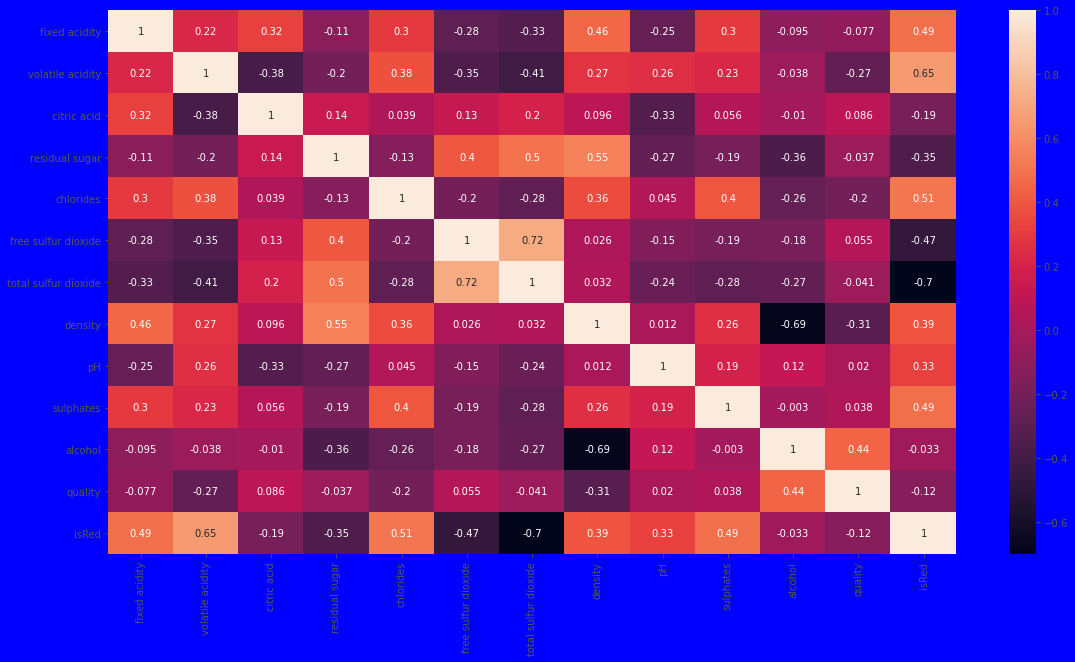

In [12]:
# ploting heatmap
plt.figure(figsize=[19,10],facecolor='blue')
sns.heatmap(df.corr(),annot=True)

In [13]:
# here is the value>0.7, it is considered as highly related
for a in range(len(df.corr().columns)):
    for b in range(a):
        if abs(df.corr().iloc[a,b]) >0.7:
            column = df.corr().columns[a]
            print(column)

total sulfur dioxide
isRed


## Preparing Train & Test Data Sets

In [14]:
# Checking for null values
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
isRed                   0
dtype: int64

In [15]:
#Fill those null values, in the above case no null values
df.update(df.fillna(df.mean()))

In [16]:
# for catogerical values 
df = pd.get_dummies(df,drop_first=True)
# display new dataframe
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,isRed
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,0
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,0
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,0
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,0


In [17]:
#if quality>= 7 considering it has good quality
df["best quality"] = [ 1 if x>=7 else 0 for x in df.quality] 
print(df)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4              0.70         0.00             1.9      0.076   
1               7.8              0.88         0.00             2.6      0.098   
2               7.8              0.76         0.04             2.3      0.092   
3              11.2              0.28         0.56             1.9      0.075   
4               7.4              0.70         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
4893            6.2              0.21         0.29             1.6      0.039   
4894            6.6              0.32         0.36             8.0      0.047   
4895            6.5              0.24         0.19             1.2      0.041   
4896            5.5              0.29         0.30             1.1      0.022   
4897            6.0              0.21         0.38             0.8      0.020   

      free sulfur dioxide  

In [18]:
# See proportion of good quality vs bad quality wines, there should be a good proportion
df['best quality'].value_counts()

0    5220
1    1277
Name: best quality, dtype: int64

In [19]:
# Separate feature variables and target variable
x = df.drop(['quality','best quality', 'isRed'], axis = 1)
y = df['best quality']
x,y

(      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
 0               7.4              0.70         0.00             1.9      0.076   
 1               7.8              0.88         0.00             2.6      0.098   
 2               7.8              0.76         0.04             2.3      0.092   
 3              11.2              0.28         0.56             1.9      0.075   
 4               7.4              0.70         0.00             1.9      0.076   
 ...             ...               ...          ...             ...        ...   
 4893            6.2              0.21         0.29             1.6      0.039   
 4894            6.6              0.32         0.36             8.0      0.047   
 4895            6.5              0.24         0.19             1.2      0.041   
 4896            5.5              0.29         0.30             1.1      0.022   
 4897            6.0              0.21         0.38             0.8      0.020   
 
       free su

In [20]:
# standarize the data set(mean=0, standard deviation=1)
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(x)

In [21]:
#Split the data set for cross validation
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=40)

## Random Forest Classification

In [22]:
# importing RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

#fit the model
model1 = RandomForestClassifier(random_state=1)
model1.fit(x_train, y_train)
y_pred1 = model1.predict(x_test)
score1 =model1.score(x_test,y_test)
print('score of model is : ',score1)
                         
print(classification_report(y_test,y_pred1))

score of model is :  0.8884615384615384
              precision    recall  f1-score   support

           0       0.90      0.97      0.93      1030
           1       0.82      0.60      0.69       270

    accuracy                           0.89      1300
   macro avg       0.86      0.78      0.81      1300
weighted avg       0.88      0.89      0.88      1300



In [23]:
#Differenciate Actual value and predicted value

predicted_df = {'predicted_values': y_pred1, 'original_values': y_test}
#creating new dataframe
pd.DataFrame(predicted_df).head(20)

,predicted_values,original_values
369,1,1
4644,1,0
1775,0,0
1009,0,0
220,0,0
2420,1,1
871,0,0
2111,0,0
2182,0,0
1248,0,0


<AxesSubplot:>

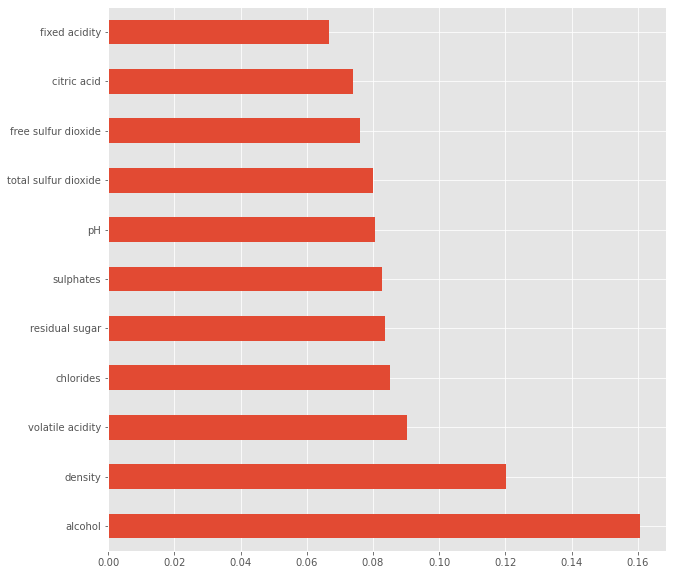

In [25]:
# Feature Importance
feat_importances = pd.Series(model1.feature_importances_, index=x.columns)
feat_importances.nlargest(25).plot(kind='barh',figsize=(10,10))